In [8]:
from ucimlrepo import fetch_ucirepo 
from implementations import bayes
from implementations import id3
from implementations import random_forest
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from typing import Tuple
import pandas as pd
import time
import importlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [5]:
wine_quality = fetch_ucirepo(id=186) 
  
X = np.array(wine_quality.data.features)
y = np.array(wine_quality.data.targets.quality) 

def reassign_classes(y: np.ndarray) -> np.ndarray:
    new_y = []
    for current_class in y:
        if current_class > 5:
            new_y.append(1)
        else:
            new_y.append(0)
    return new_y

y = reassign_classes(y)

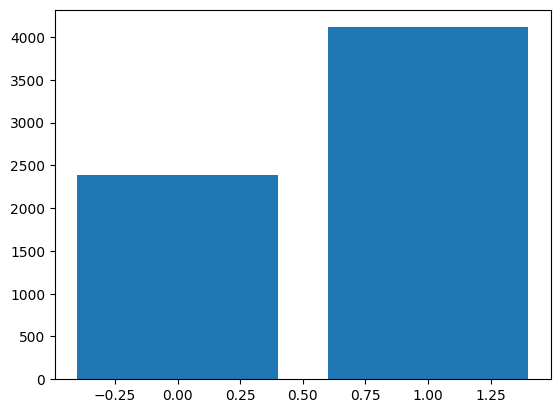

In [7]:
c = Counter()
c.update(y)
plt.bar([x for x in range(2)], c.values())
plt.show()

In [13]:
importlib.reload(random_forest)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
accuracies = []
time1 = time.time()

for _ in range(1):
    y_pred = []
    rfc = random_forest.RandomForestClassifier(classifiers_number=50)
    rfc.train_random_forest(x_train, y_train, tree_percentage=1.0)
    
    samples = len(y_test)
    correctly_predicted = 0
    for sample, gt in zip(x_test, y_test):
        prediction = rfc.predict(sample)
        y_pred.append(prediction)
        print(int(prediction), gt)
        if prediction == gt:
            correctly_predicted += 1
    
    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 1
1 1
1 1
0 0
1 1
1 1
1 0
1 1
0 0
0 0
1 1
0 0
1 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
1 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 0
1 1
0 0
1 1
1 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 0
1 1
0 1
1 1
1 1
1 1
0 0
0 0
0 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
0 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 1
0 0
1 0
1 1
0 0
1 1
1 1
1 1
0 0
1 0
1 1
0 0
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 0
0 1
0 0
0 0
0 0
0 0
1 1
1 0
1 1
0 0
1 1
1 1
1 0
1 1
0 0
0 0
1 1
0 1
1 1
1 1
1 1
1 0
1 1
0 0
1 0
1 1
1 1
0 1
0 0
1 0
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
1 1
1 0
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
0 0
1 0
1 1
0 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 0
1 0


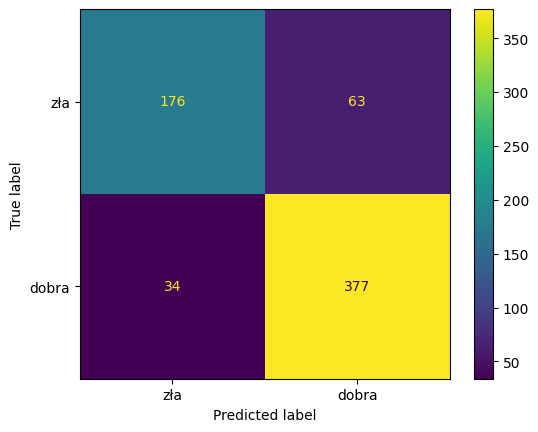

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["zła", "dobra"])
disp.plot()
plt.show()

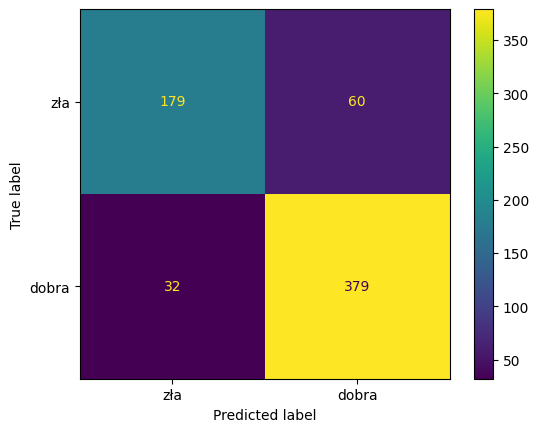

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["zła", "dobra"])
disp.plot()
plt.show()